# Artificial Neural Networks
## My first Kaggle Submission

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K
from keras.callbacks import Callback
%pylab inline

Using Theano backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
training_data = pd.read_csv('/Users/najeebkhan/Desktop/Dataset/train.csv')

In [3]:
training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X  = (training_data.iloc[:30000,1:].values)
X_cv = (training_data.iloc[30000:,1:].values)

In [6]:
labels = training_data.iloc[:,0].values

In [7]:
y = np.zeros((30000,10))
for i in range(30000):
    y[i][labels[i]] = 1
y_cv = np.zeros((12000,10))
for i in range(12000):
    y_cv[i][labels[30000 + i]] = 1

In [8]:
y

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
y_cv

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [33]:
## Keras Model for implementing the Neural Networks
model = Sequential([
        Dense(32,input_dim=784),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(32),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(10),
        Activation('sigmoid'),
    ])

In [34]:
model.compile(optimizer = 'adadelta',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [35]:
hist = model.fit(X,y,nb_epoch = 50,batch_size = 32,verbose = 0)

In [36]:
score = model.evaluate(X_cv,y_cv,batch_size = 32, verbose = 0)

In [37]:
print score

[0.30793251706163088, 0.90666666666666662]


In [38]:
test_data = pd.read_csv('/Users/najeebkhan/Desktop/Dataset/test.csv').values

In [39]:
## Predicting the data for the testcase
yPred = model.predict_classes(test_data)

28000/28000 [==============================] - 1s     


In [40]:
np.savetxt('najeeb.csv',np.c_[range(1,len(yPred)+1),yPred],delimiter=',',header='ImageId,Label',comments='',fmt='%d')

In [41]:
info = hist.history
print info
print info.keys()

{'acc': [0.29133333333333333, 0.53273333333333328, 0.63466666666666671, 0.69816666666666671, 0.73109999999999997, 0.75556666666666672, 0.77316666666666667, 0.78676666666666661, 0.79893333333333338, 0.80303333333333338, 0.81059999999999999, 0.81713333333333338, 0.82446666666666668, 0.82866666666666666, 0.83103333333333329, 0.83326666666666671, 0.83860000000000001, 0.84223333333333328, 0.84360000000000002, 0.84809999999999997, 0.8484666666666667, 0.84963333333333335, 0.85306666666666664, 0.85603333333333331, 0.85733333333333328, 0.85799999999999998, 0.86116666666666664, 0.86176666666666668, 0.86313333333333331, 0.86533333333333329, 0.86416666666666664, 0.86653333333333338, 0.8669, 0.86886666666666668, 0.86843333333333328, 0.87090000000000001, 0.87233333333333329, 0.87423333333333331, 0.87423333333333331, 0.874, 0.87629999999999997, 0.87870000000000004, 0.87886666666666668, 0.87573333333333336, 0.87836666666666663, 0.87666666666666671, 0.87816666666666665, 0.88180000000000003, 0.881566666

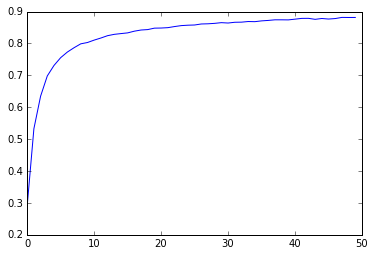

In [42]:
plt.plot(info['acc'])

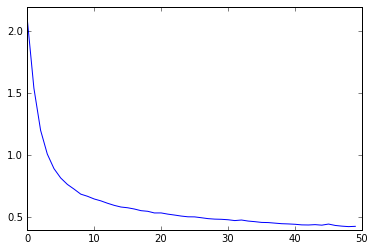

In [43]:
plt.plot(info['loss'])